In [36]:
!pip install keras
!pip install keras-hub
!wget -O mountain_dog.png https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog.png
!wget -O mountain_dog_mask.png https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog_mask.png

--2024-12-01 08:38:46--  https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1187310 (1.1M) [image/png]
Saving to: ‘mountain_dog.png’

mountain_dog.png    100%[===================>]   1.13M  --.-KB/s    in 0.05s   

2024-12-01 08:38:47 (24.9 MB/s) - ‘mountain_dog.png’ saved [1187310/1187310]

--2024-12-01 08:38:47--  https://raw.githubusercontent.com/keras-team/keras-io/master/guides/img/stable_diffusion_3_in_keras_hub/mountain_dog_mask.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|

In [2]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import time

import keras
import keras_hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [37]:
text_to_image = keras_hub.models.StableDiffusion3TextToImage.from_preset(
    "stable_diffusion_3_medium", height=512, width=512, dtype="float16"
)

ValueError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 18874882 bytes.

In [38]:
generated_image = text_to_image.generate(
    "a little flying bird"
)

ValueError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 1362667800 bytes.

In [13]:
def display_generated_images(images):
    """Helper function to display the images from the inputs.

    This function accepts the following input formats:
    - 3D numpy array.
    - 4D numpy array: concatenated horizontally.
    - List of 3D numpy arrays: concatenated horizontally.
    """
    display_image = None
    if isinstance(images, np.ndarray):
        if images.ndim == 3:
            display_image = Image.fromarray(images)
        elif images.ndim == 4:
            concated_images = np.concatenate(list(images), axis=1)
            display_image = Image.fromarray(concated_images)
    elif isinstance(images, list):
        concated_images = np.concatenate(images, axis=1)
        display_image = Image.fromarray(concated_images)

    if display_image is None:
        raise ValueError("Unsupported input format.")

    plt.figure(figsize=(40, 40))
    plt.axis("off")
    plt.imshow(display_image)
    plt.show()
    plt.close()

In [10]:
print(type(generated_image))
print(generated_image.shape)
print(generated_image.ndim)

<class 'numpy.ndarray'>
(512, 512, 3)
3


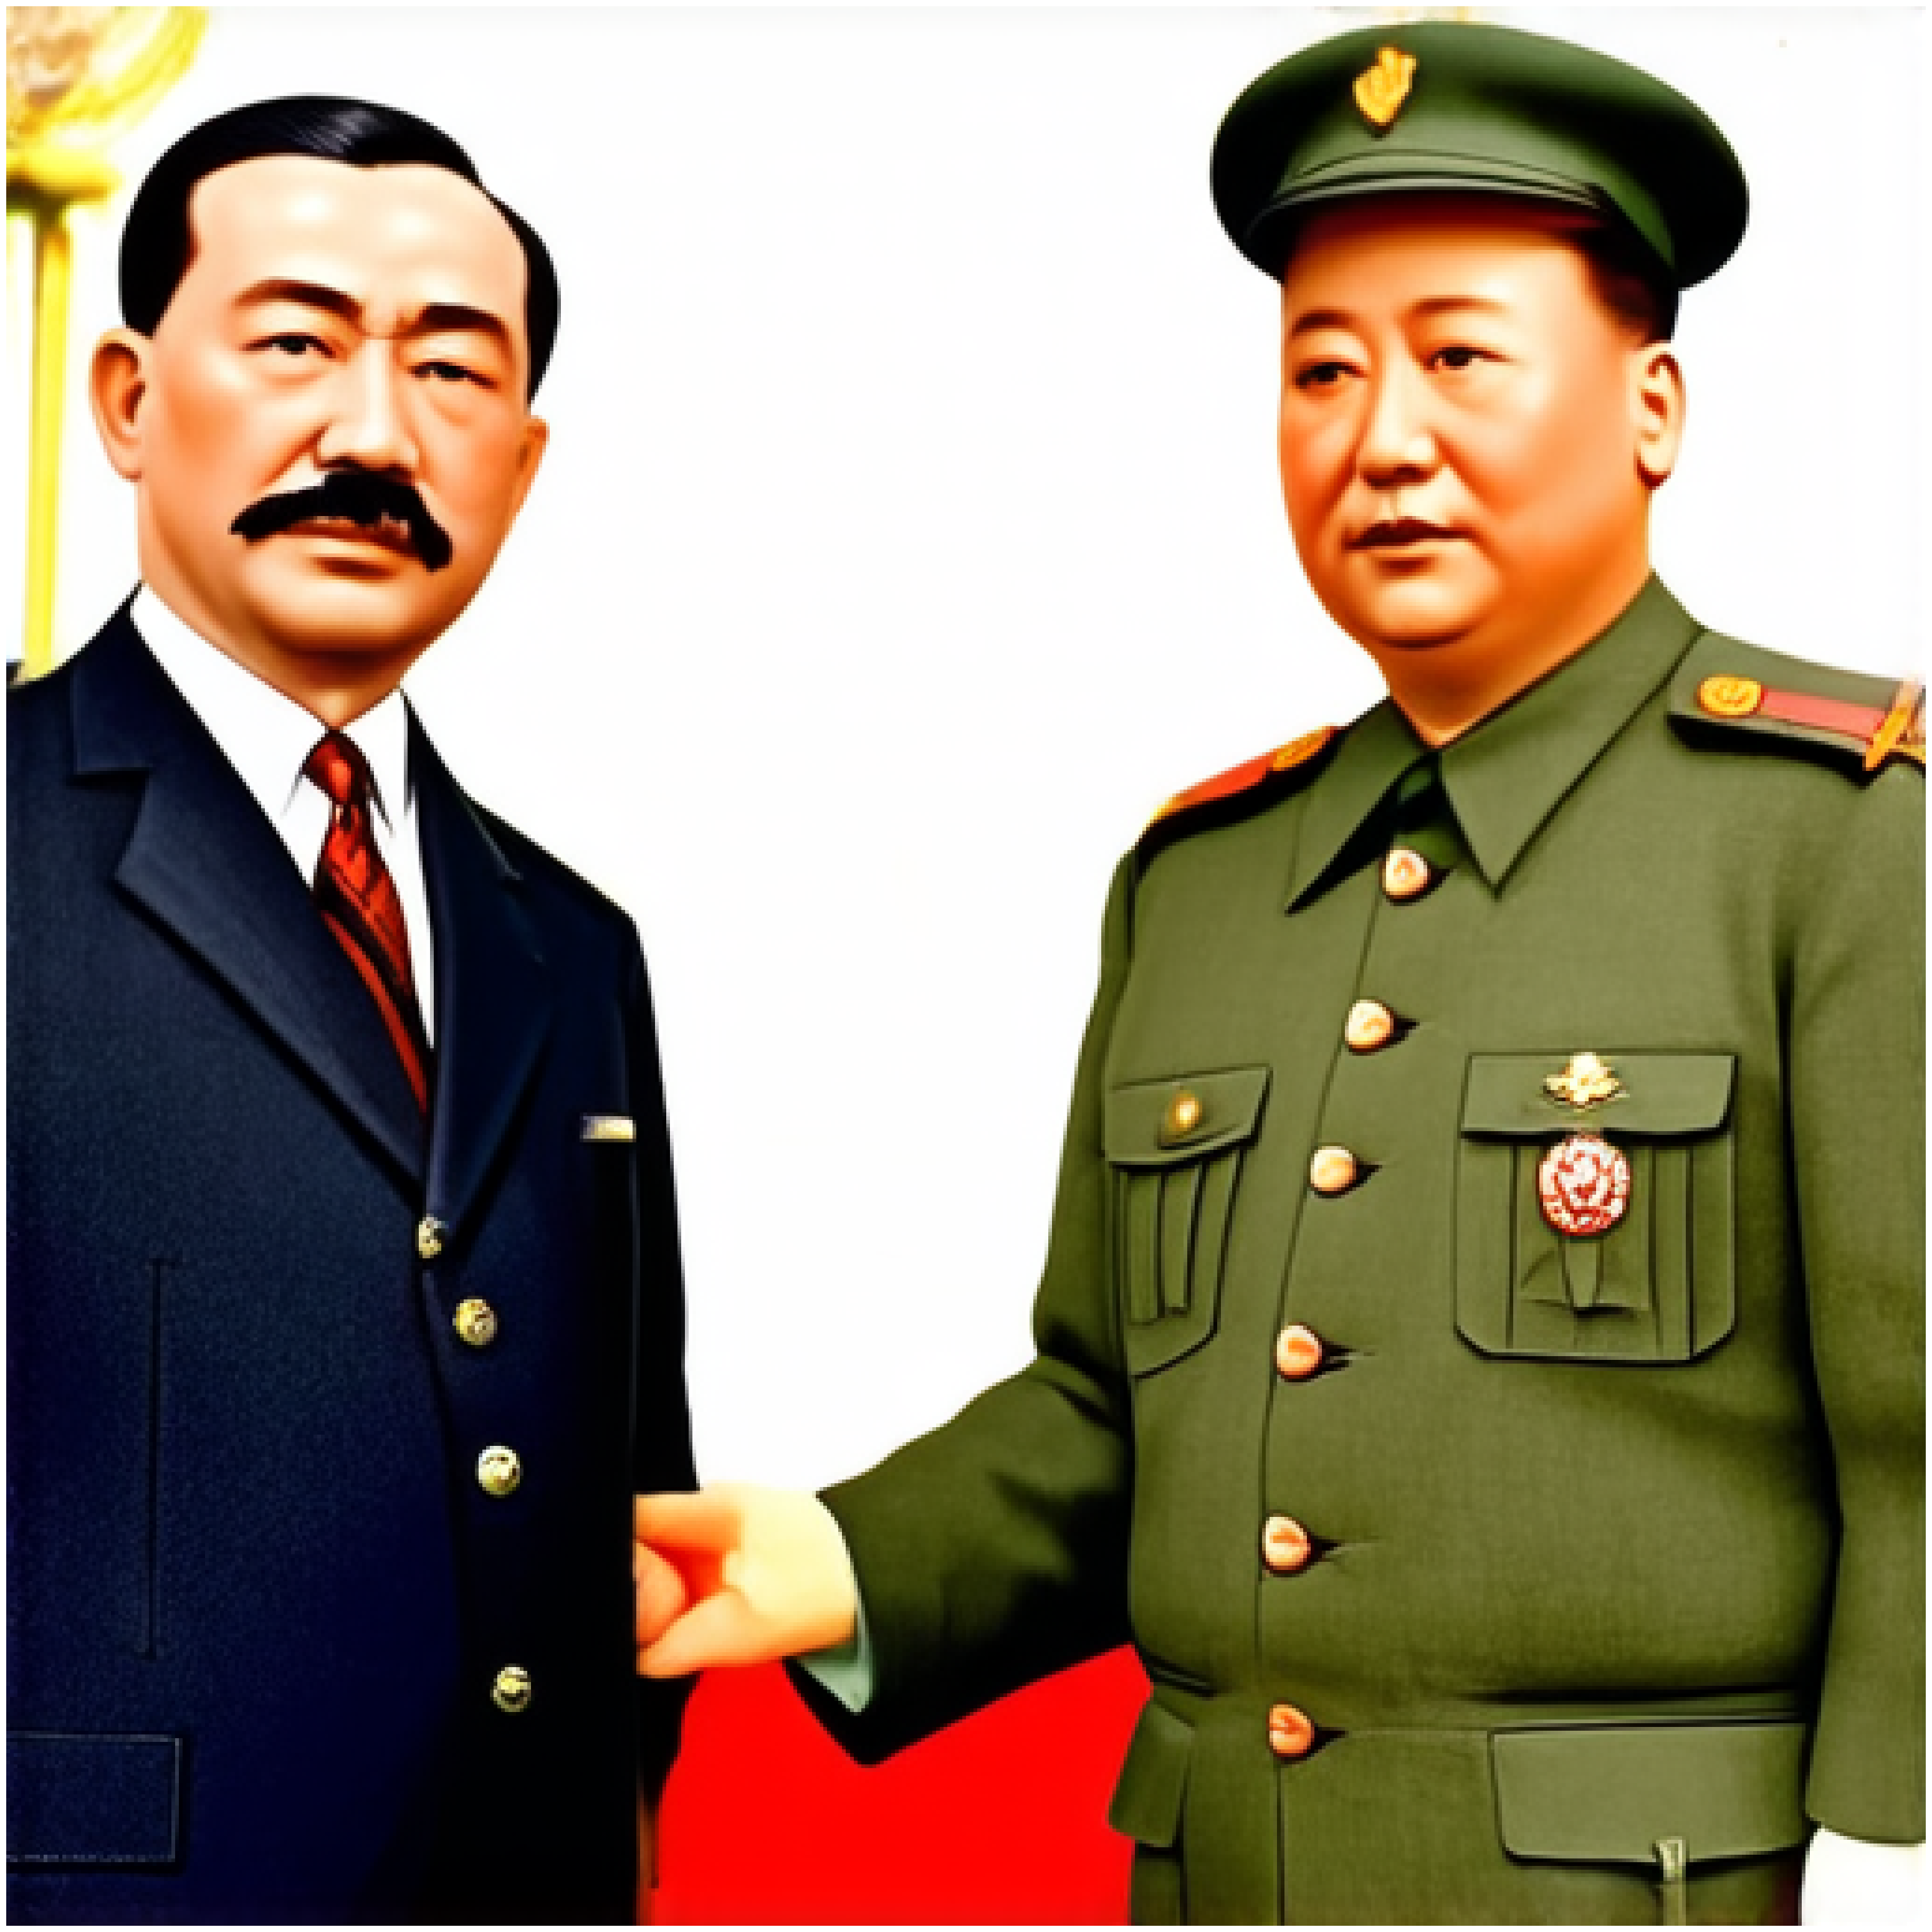

In [28]:
display_generated_images(generated_image)

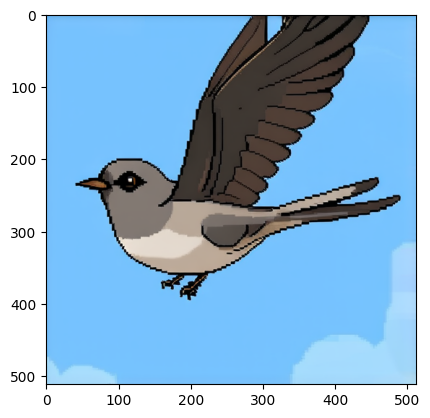

In [39]:
plt.imshow(generated_image)